In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_events_org = pd.read_csv("train_event_data.csv", dtype={'device_id': np.str, 'latitude': np.float, 'longitude':np.float})

In [3]:
df_events_org.head(n=100)

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,33.98,116.79
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,33.98,116.79
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,33.98,116.79
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,33.98,116.79
...,...,...,...,...,...,...,...,...
95,-7548291590301750000,M,33,M32+,1941221.0,2016-05-01 18:45:23,33.98,116.79
96,-7548291590301750000,M,33,M32+,1481754.0,2016-05-03 16:08:25,33.98,116.79
97,-7548291590301750000,M,33,M32+,1473446.0,2016-05-01 10:52:20,33.98,116.79
98,-7548291590301750000,M,33,M32+,1473408.0,2016-05-01 10:10:18,33.98,116.79


In [4]:
df_events = df_events_org[df_events_org['event_id'].notnull()]
df_events.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,33.98,116.79
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,33.98,116.79
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,33.98,116.79
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,33.98,116.79


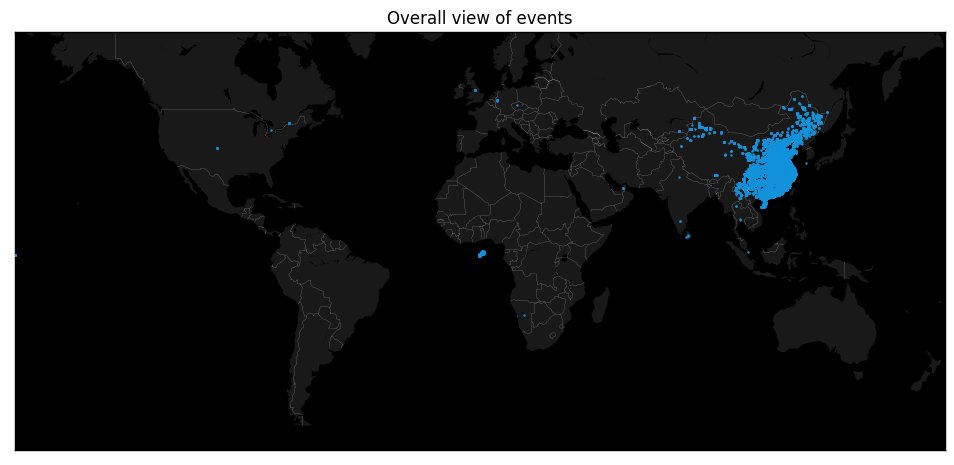

In [5]:
# set up plot
df_events_sample = df_events.sample(n=100000)
plt.figure(1, figsize=(12,6))

#Meractor of World
m1 = Basemap(projection='merc',
             llcrnrlat = -60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919', lake_color='#000000') #dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000') # balck background
m1.drawcountries(linewidth=0.1, color='w') #thin white line for country borders

#Plot the data
mxy = m1(df_events_sample["longitude"].tolist(), df_events_sample["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Overall view of events")
plt.show()

In [6]:
df_0 = df_events[(df_events["longitude"] ==0) & (df_events["latitude"] ==0)]
df_0_around = df_events[(df_events["longitude"] > -1) & \
                   (df_events["longitude"] < 1) &\
                   (df_events["latitude"] >-1) &\
                   (df_events["latitude"] <1)]

print(len(df_events))
print(len(df_0))
print(len(df_0_around))

1215598
356157
356570


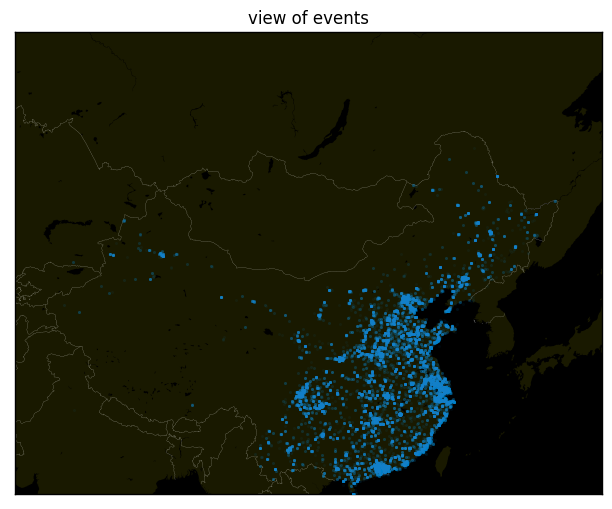

In [7]:
#specific region
lon_min, lon_max = 70, 140
lat_min, lat_max = 20, 60

idx = (df_events["longitude"] > lon_min) &\
      (df_events["longitude"] < lon_max) &\
      (df_events["latitude"] > lat_min) &\
      (df_events["latitude"] < lat_max)
df_events_sample = df_events[idx].sample(n=100000)
plt.figure(2, figsize=(12,6))

m2 = Basemap(projection='merc',
             llcrnrlat = lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191900', lake_color='#000000') #dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000') # balck background
m2.drawcountries(linewidth=0.1, color='w') #thin white line for country borders

#Plot the data
mxy = m2(df_events_sample["longitude"].tolist(), df_events_sample["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("view of events")
plt.show()

In [8]:
df_male = df_events_sample[df_events_sample["gender"]=="M"]

In [9]:
df_male

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
426029,2115961289860370000,M,28,M25-32,3120592.0,2016-05-05 19:21:43,31.46,104.72
292982,5329928988805640000,M,26,M25-32,2532155.0,2016-05-06 20:43:21,31.31,121.18
823364,3702678348359780000,M,40,M32+,1397418.0,2016-05-03 16:49:36,36.68,117.54
680936,-7862029811871050000,M,27,M25-32,2543397.0,2016-05-04 01:10:40,25.00,102.83
272516,122161067698560000,M,28,M25-32,444075.0,2016-05-06 10:14:34,24.47,118.08
...,...,...,...,...,...,...,...,...
982529,5871294352051720000,M,25,M25-32,1748616.0,2016-05-02 13:58:48,23.07,114.40
963594,-2668732172869120000,M,53,M32+,2376118.0,2016-05-07 18:58:24,47.25,132.03
396709,-8686980665310410000,M,47,M32+,2811750.0,2016-05-03 19:01:14,30.94,118.77
691945,2735525099593230000,M,31,M25-32,2429884.0,2016-05-05 14:43:04,31.48,104.67


## Visualization for Male

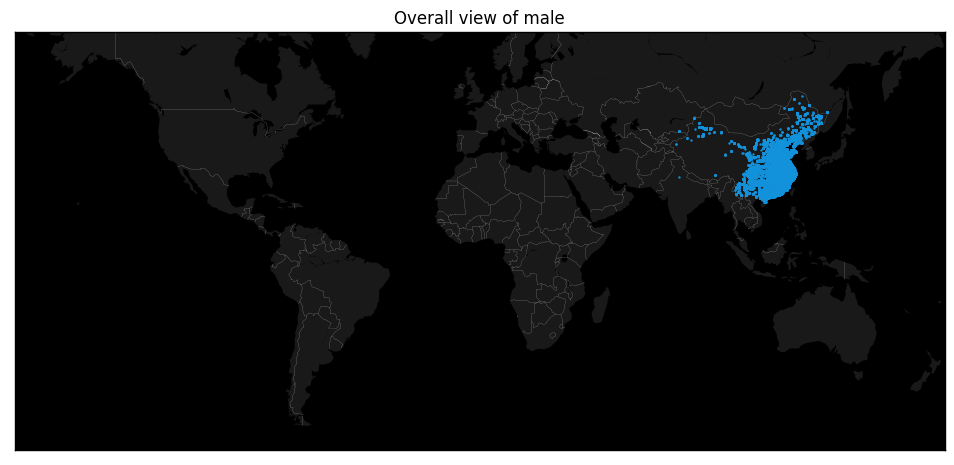

In [11]:
plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat = -60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919', lake_color='#000000') #dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000') # balck background
m1.drawcountries(linewidth=0.1, color='w') #thin white line for country borders

#Plot the data
mxy = m1(df_male["longitude"].tolist(), df_male["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Overall view of male")
plt.show()

In [12]:
df_female = df_events_sample[df_events_sample["gender"]=="F"]

In [13]:
df_female

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
1113000,4357191408840110000,F,33,F32+,1546460.0,2016-05-03 19:21:42,48.24,126.52
967774,-2802131021308890000,F,26,F25-32,2301221.0,2016-05-06 22:22:56,35.84,117.64
638449,-5526220929433220000,F,29,F25-32,601821.0,2016-05-01 11:22:16,45.13,124.83
776593,-2773920301437220000,F,27,F25-32,801908.0,2016-05-04 21:36:37,40.09,113.29
79181,-2396752884134280000,F,25,F25-32,1587415.0,2016-05-01 19:31:18,29.33,113.18
...,...,...,...,...,...,...,...,...
213470,-2157592837046380000,F,41,F32+,1239212.0,2016-05-04 20:24:01,26.95,106.69
283405,2976914939399440000,F,28,F25-32,2998221.0,2016-05-07 12:14:33,30.81,103.88
108091,4274683512154090000,F,38,F32+,753623.0,2016-05-01 21:31:06,46.25,130.60
714382,-8504879428986710000,F,51,F32+,536689.0,2016-05-04 22:28:49,39.88,116.44


## Visualization for Female

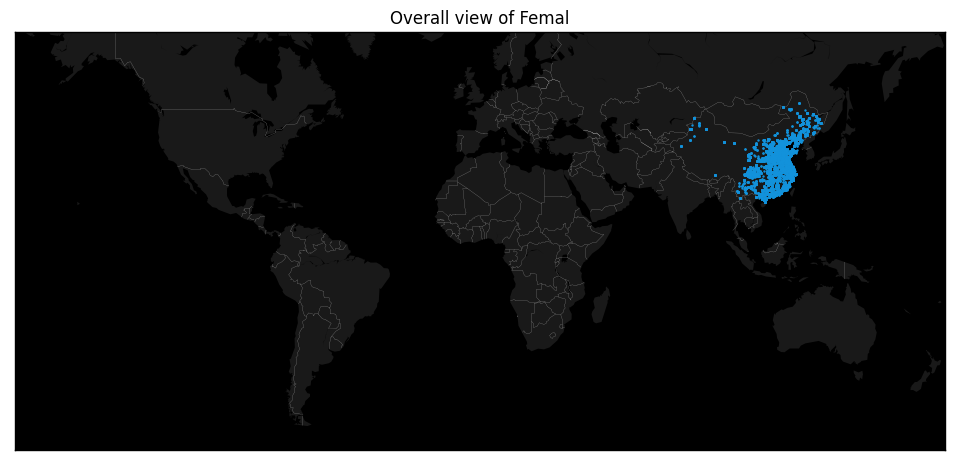

In [14]:
plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat = -60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919', lake_color='#000000') #dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000') # balck background
m1.drawcountries(linewidth=0.1, color='w') #thin white line for country borders

#Plot the data
mxy = m1(df_female["longitude"].tolist(), df_female["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Overall view of Femal")
plt.show()